<a href="https://colab.research.google.com/github/softmurata/colab_notebooks/blob/main/semantic_segmentation/mmseg_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.1/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.1/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 13.7 MB/s eta 0:00:00
  Created wheel for mmcv-full: filename=mmcv_full-1.7.1-cp38-cp38-linux_x86_64.whl size=34283842 sha256=0ca6deac61b29e5a533aaf82c4d8011b02d87c67168d4a0b51a73da9255e506e
  Stored in directory: /root/.cache/pip/wheels/24/44/db/a65e1126f40e4f014403114e84dfd9ed0c777213c9f0046ecc
Successfully built mmcv-full


In [2]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 13490, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 13490 (delta 32), reused 56 (delta 10), pack-reused 13361
Receiving objects: 100% (13490/13490), 15.76 MiB | 38.33 MiB/s, done.
Resolving deltas: 100% (9645/9645), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.8/648.8 KB 10.7 MB/s eta 0:00:00
  Running setup.py develop for mmsegmentation


In [3]:
import os

DATA_DIR = '/content/data/CamVid/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial /content/data')
    print('Done!')

Loading data...
Done!


In [4]:
#学習済みモデルの入手
%cd /content/mmsegmentation
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints

/content/mmsegmentation
--2023-02-13 06:57:22--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.38.121.207, 8.38.121.209, 8.38.121.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.38.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  25.9MB/s    in 7.4s    

2023-02-13 06:57:30 (25.4 MB/s) - ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]



In [5]:
#mmsegmentationのモジュールの呼び出し

from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

#モデルの選択、および学習済みモデルの呼び出し
config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
checkpoint_file = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

#mmsegmentationの実行（GPUあり）
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


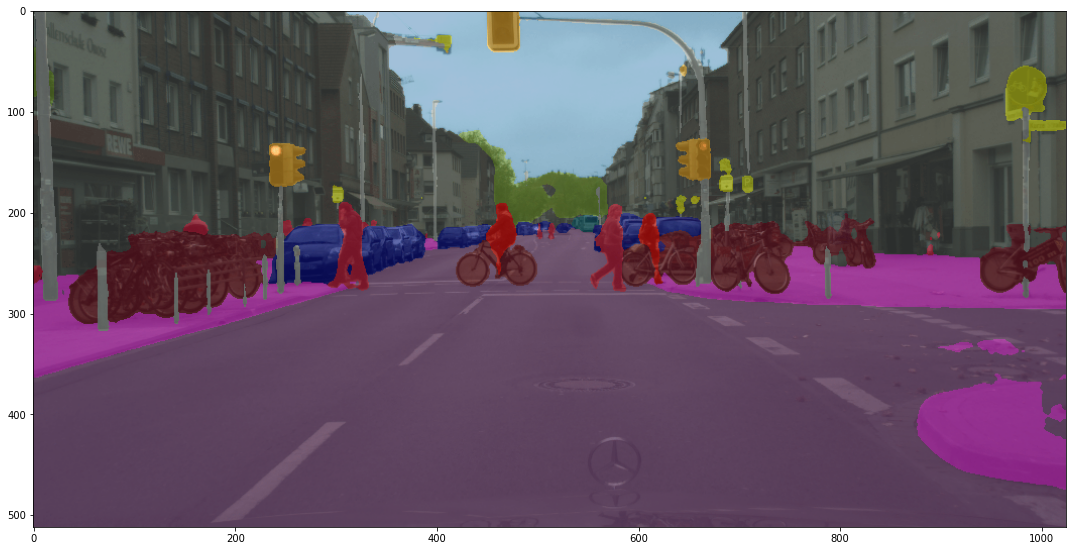

In [6]:
# test a single image
img = 'demo/demo.png'
result = inference_segmentor(model, img)

# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))

In [1]:
# if you meet some errors, please restart kernel and start this point
%cd /content/mmsegmentation

/content/mmsegmentation


In [2]:
#@title training
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = '/content/data/CamVid'
img_dir = 'train'
ann_dir = 'trainannot'
# define class and plaette for better visualization
classes = ('sky', 'Bulding', 'Pole', 'Road_marking', 'Road', 'Pavement', 'Tree', 'SingSymbole','Fence', 'Car', 'Pedestrian', 'Bicyclist', 'Unlabeled')
palette = [[128,128,128], [128,0,0], [192,192,128], [255,69,0], [128,64,128], [60,40,222], [128,128,0], [192,128,128], [64,64,128], [64,0,128], [64,64,0], [0,128,192], [0,0,0]]

In [3]:
# split train/val set randomly
import mmcv
split_dir = 'splits_resnet50A'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [4]:
# convert dataset for mmsegmentation
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class splits_resnet50A(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

In [5]:
# create config
from mmcv import Config
cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')

In [ ]:
from mmseg.apis import set_random_seed
from mmseg.utils import get_device
import mmcv

img = mmcv.imread('/content/data/CamVid/train/0001TP_006690.png')
h = img.shape[0]
w = img.shape[1]

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
   CLASSES=classes,
 PALETTE=palette)

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = len(classes) #8
cfg.model.auxiliary_head.num_classes = len(classes) #8

# Modify dataset type and path
cfg.dataset_type = 'splits_resnet50A'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(w, h), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(w, h),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits_resnet50A/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits_resnet50A/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits_resnet50A/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
#cfg.load_from = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial_pspnet_r50A'

cfg.total_iters = 100  # ToDo: change
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 1000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

# Please check this file(https://mmsegmentation.readthedocs.io/en/latest/tutorials/config.html)
cfg.runner.max_iters=4000 # Total number of iterations. For EpochBasedRunner use `max_epochs`

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

In [7]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2023-02-13 07:39:46,817 - mmseg - INFO - Loaded 293 images
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slown

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 11.5 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:42:11,356 - mmseg - INFO - per class results:
2023-02-13 07:42:11,363 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 80.65 | 88.51 |
|   Bulding    | 50.85 | 65.43 |
|     Pole     |  0.0  |  0.0  |
| Road_marking | 81.97 | 95.95 |
|     Road     | 21.58 | 26.25 |
|   Pavement   | 33.38 |  55.0 |
|     Tree     |  0.0  |  0.0  |
| SingSymbole  |  0.0  |  0.0  |
|    Fence     | 33.43 | 79.82 |
|     Car      |  0.0  |  0.0  |
|  Pedestrian  |  0.0  |  0.0  |
|  Bicyclist   |  5.08 |  5.68 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:42:11,367 - mmseg - INFO - Summary:
2023-02-13 07:42:11,369 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 71.38 | 25.58 | 34.72 |
+-------+-------+-------+
2023-02-13 07:42:11,371 - mmseg - INFO - Iter(val) [74]	aAcc: 0.7138, mIoU: 0.2558, mAcc: 0.3472, IoU.sky: 0.8065, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 11.9 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:44:39,413 - mmseg - INFO - per class results:
2023-02-13 07:44:39,418 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 85.33 |  93.5 |
|   Bulding    | 53.12 | 77.51 |
|     Pole     |  0.0  |  0.0  |
| Road_marking | 84.56 | 97.61 |
|     Road     | 21.83 | 24.52 |
|   Pavement   | 26.86 |  48.2 |
|     Tree     |  0.0  |  0.0  |
| SingSymbole  |  0.0  |  0.0  |
|    Fence     | 49.63 | 58.74 |
|     Car      |  0.0  |  0.0  |
|  Pedestrian  |  0.0  |  0.0  |
|  Bicyclist   |  3.51 |  3.71 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:44:39,420 - mmseg - INFO - Summary:
2023-02-13 07:44:39,422 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 73.56 | 27.07 | 33.65 |
+-------+-------+-------+
2023-02-13 07:44:39,429 - mmseg - INFO - Iter(val) [74]	aAcc: 0.7356, mIoU: 0.2707, mAcc: 0.3365, IoU.sky: 0.8533, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.6 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:47:03,400 - mmseg - INFO - per class results:
2023-02-13 07:47:03,403 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 87.01 | 94.53 |
|   Bulding    | 68.42 | 87.59 |
|     Pole     |  0.0  |  0.0  |
| Road_marking | 88.64 | 96.27 |
|     Road     | 42.81 | 53.02 |
|   Pavement   | 55.28 | 74.95 |
|     Tree     |  0.0  |  0.0  |
| SingSymbole  |  7.84 |  9.51 |
|    Fence     |  56.0 |  86.1 |
|     Car      |  2.25 |  2.48 |
|  Pedestrian  |  0.0  |  0.0  |
|  Bicyclist   |  6.52 |  7.19 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:47:03,405 - mmseg - INFO - Summary:
2023-02-13 07:47:03,407 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 81.29 | 34.56 | 42.64 |
+-------+-------+-------+
2023-02-13 07:47:03,409 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8129, mIoU: 0.3456, mAcc: 0.4264, IoU.sky: 0.8701, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.5 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:49:30,661 - mmseg - INFO - per class results:
2023-02-13 07:49:30,666 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 87.36 | 92.62 |
|   Bulding    | 71.11 | 83.04 |
|     Pole     |  0.0  |  0.0  |
| Road_marking | 88.73 | 96.35 |
|     Road     | 41.55 |  46.6 |
|   Pavement   | 52.74 | 88.17 |
|     Tree     |  0.0  |  0.0  |
| SingSymbole  |  8.1  |  8.3  |
|    Fence     | 53.53 | 88.41 |
|     Car      |  1.35 |  1.41 |
|  Pedestrian  |  0.7  |  0.72 |
|  Bicyclist   | 10.26 | 11.59 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:49:30,668 - mmseg - INFO - Summary:
2023-02-13 07:49:30,674 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 81.26 | 34.62 | 43.1 |
+-------+-------+------+
2023-02-13 07:49:30,676 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8126, mIoU: 0.3462, mAcc: 0.4310, IoU.sky: 0.8736, IoU.B

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.3 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:51:56,991 - mmseg - INFO - per class results:
2023-02-13 07:51:56,995 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 85.87 | 90.63 |
|   Bulding    | 62.31 | 95.01 |
|     Pole     |  0.46 |  0.47 |
| Road_marking |  90.6 |  94.7 |
|     Road     | 52.18 | 68.21 |
|   Pavement   | 49.25 | 60.55 |
|     Tree     |  0.0  |  0.0  |
| SingSymbole  | 19.52 | 31.12 |
|    Fence     | 55.31 | 58.32 |
|     Car      |  4.63 |  5.83 |
|  Pedestrian  |  9.34 | 11.27 |
|  Bicyclist   | 13.42 | 15.33 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:51:56,997 - mmseg - INFO - Summary:
2023-02-13 07:51:57,001 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 80.3 | 36.91 | 44.29 |
+------+-------+-------+
2023-02-13 07:51:57,003 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8030, mIoU: 0.3691, mAcc: 0.4429, IoU.sky: 0.8587, IoU.B

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.3 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:54:24,835 - mmseg - INFO - per class results:
2023-02-13 07:54:24,838 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 77.36 | 78.13 |
|   Bulding    | 67.17 | 75.76 |
|     Pole     |  1.6  |  1.64 |
| Road_marking | 91.16 | 93.25 |
|     Road     | 60.84 | 77.26 |
|   Pavement   | 42.62 | 95.38 |
|     Tree     |  2.86 |  2.97 |
| SingSymbole  | 19.31 | 21.52 |
|    Fence     | 63.34 | 83.88 |
|     Car      | 12.69 | 18.75 |
|  Pedestrian  | 12.59 |  17.5 |
|  Bicyclist   | 20.85 | 26.95 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:54:24,840 - mmseg - INFO - Summary:
2023-02-13 07:54:24,842 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 79.09 | 39.37 | 49.42 |
+-------+-------+-------+
2023-02-13 07:54:24,845 - mmseg - INFO - Iter(val) [74]	aAcc: 0.7909, mIoU: 0.3937, mAcc: 0.4942, IoU.sky: 0.7736, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.9 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:56:49,552 - mmseg - INFO - per class results:
2023-02-13 07:56:49,556 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 88.61 | 93.31 |
|   Bulding    | 73.41 |  94.8 |
|     Pole     |  2.2  |  2.32 |
| Road_marking | 92.12 | 94.45 |
|     Road     | 54.87 | 71.29 |
|   Pavement   | 61.33 | 76.74 |
|     Tree     |  9.39 | 11.26 |
| SingSymbole  | 23.72 | 30.54 |
|    Fence     | 71.34 | 88.99 |
|     Car      | 13.16 | 18.71 |
|  Pedestrian  | 12.75 | 21.83 |
|  Bicyclist   | 19.91 | 23.68 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:56:49,558 - mmseg - INFO - Summary:
2023-02-13 07:56:49,560 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 84.63 | 43.57 | 52.33 |
+-------+-------+-------+
2023-02-13 07:56:49,562 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8463, mIoU: 0.4357, mAcc: 0.5233, IoU.sky: 0.8861, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 13.0 task/s, elapsed: 6s, ETA:     0s

2023-02-13 07:59:14,642 - mmseg - INFO - per class results:
2023-02-13 07:59:14,645 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 88.93 | 92.98 |
|   Bulding    | 75.73 |  92.0 |
|     Pole     |  4.34 |  4.63 |
| Road_marking | 92.99 | 95.41 |
|     Road     | 56.85 | 65.22 |
|   Pavement   | 61.81 | 90.87 |
|     Tree     | 17.57 |  22.0 |
| SingSymbole  | 27.04 | 32.17 |
|    Fence     | 69.69 | 87.67 |
|     Car      |  8.68 |  9.87 |
|  Pedestrian  |  17.0 |  18.2 |
|  Bicyclist   | 21.82 | 25.28 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 07:59:14,647 - mmseg - INFO - Summary:
2023-02-13 07:59:14,649 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 85.46 | 45.2 | 53.03 |
+-------+------+-------+
2023-02-13 07:59:14,651 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8546, mIoU: 0.4520, mAcc: 0.5303, IoU.sky: 0.8893, IoU.B

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 11.8 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:01:36,591 - mmseg - INFO - per class results:
2023-02-13 08:01:36,596 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 89.25 | 93.78 |
|   Bulding    | 79.06 | 91.71 |
|     Pole     |  5.01 |  5.6  |
| Road_marking | 93.61 | 97.57 |
|     Road     | 61.97 | 73.52 |
|   Pavement   |  64.8 | 88.02 |
|     Tree     | 16.46 | 18.09 |
| SingSymbole  | 37.45 | 55.56 |
|    Fence     | 75.99 | 90.15 |
|     Car      | 18.51 | 27.61 |
|  Pedestrian  | 21.55 | 24.21 |
|  Bicyclist   | 28.29 | 31.78 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:01:36,597 - mmseg - INFO - Summary:
2023-02-13 08:01:36,599 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.11 | 49.33 | 58.13 |
+-------+-------+-------+
2023-02-13 08:01:36,603 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8711, mIoU: 0.4933, mAcc: 0.5813, IoU.sky: 0.8925, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.4 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:04:05,606 - mmseg - INFO - per class results:
2023-02-13 08:04:05,609 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 89.48 | 93.31 |
|   Bulding    | 80.56 | 90.39 |
|     Pole     |  8.26 |  9.39 |
| Road_marking | 94.84 | 97.54 |
|     Road     | 68.64 | 82.15 |
|   Pavement   | 64.93 |  89.2 |
|     Tree     |  20.3 | 23.01 |
| SingSymbole  | 38.76 |  63.3 |
|    Fence     | 76.58 | 90.41 |
|     Car      | 20.74 | 28.55 |
|  Pedestrian  |  29.3 | 38.25 |
|  Bicyclist   | 31.54 | 38.02 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:04:05,611 - mmseg - INFO - Summary:
2023-02-13 08:04:05,613 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.78 | 51.99 | 61.96 |
+-------+-------+-------+
2023-02-13 08:04:05,615 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8778, mIoU: 0.5199, mAcc: 0.6196, IoU.sky: 0.8948, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.9 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:06:33,119 - mmseg - INFO - per class results:
2023-02-13 08:06:33,122 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      |  46.5 | 46.94 |
|   Bulding    | 79.58 | 93.65 |
|     Pole     |  9.1  | 10.57 |
| Road_marking | 94.35 | 96.85 |
|     Road     | 69.15 |  79.8 |
|   Pavement   | 39.82 | 85.12 |
|     Tree     |  18.7 | 21.16 |
| SingSymbole  | 45.14 | 59.34 |
|    Fence     | 71.68 | 88.54 |
|     Car      | 14.66 | 17.28 |
|  Pedestrian  | 34.43 |  42.7 |
|  Bicyclist   | 31.59 | 42.25 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:06:33,123 - mmseg - INFO - Summary:
2023-02-13 08:06:33,126 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 79.46 | 46.23 | 57.02 |
+-------+-------+-------+
2023-02-13 08:06:33,128 - mmseg - INFO - Iter(val) [74]	aAcc: 0.7946, mIoU: 0.4623, mAcc: 0.5702, IoU.sky: 0.4650, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.2 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:08:58,075 - mmseg - INFO - per class results:
2023-02-13 08:08:58,077 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 89.45 | 92.91 |
|   Bulding    | 80.08 |  91.7 |
|     Pole     | 10.22 | 13.09 |
| Road_marking | 94.18 | 95.56 |
|     Road     | 65.05 | 80.11 |
|   Pavement   | 66.22 | 87.55 |
|     Tree     |  30.9 | 42.12 |
| SingSymbole  | 37.19 |  62.9 |
|    Fence     | 75.66 | 88.93 |
|     Car      | 21.31 | 29.87 |
|  Pedestrian  | 24.94 | 28.09 |
|  Bicyclist   | 33.63 |  42.0 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:08:58,080 - mmseg - INFO - Summary:
2023-02-13 08:08:58,082 - mmseg - INFO - 
+-------+------+------+
|  aAcc | mIoU | mAcc |
+-------+------+------+
| 87.48 | 52.4 | 62.9 |
+-------+------+------+
2023-02-13 08:08:58,083 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8748, mIoU: 0.5240, mAcc: 0.6290, IoU.sky: 0.8945, IoU.Buldin

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.5 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:11:25,779 - mmseg - INFO - per class results:
2023-02-13 08:11:25,782 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 89.74 | 94.92 |
|   Bulding    | 77.98 | 95.33 |
|     Pole     | 11.86 | 15.73 |
| Road_marking | 94.87 | 96.99 |
|     Road     |  69.6 | 84.12 |
|   Pavement   | 66.43 | 82.47 |
|     Tree     |  27.1 | 35.64 |
| SingSymbole  | 38.88 | 46.08 |
|    Fence     | 75.87 | 81.94 |
|     Car      | 16.52 | 21.13 |
|  Pedestrian  | 32.39 | 35.76 |
|  Bicyclist   | 28.51 | 32.64 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:11:25,783 - mmseg - INFO - Summary:
2023-02-13 08:11:25,785 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.71 | 52.48 | 60.23 |
+-------+-------+-------+
2023-02-13 08:11:25,788 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8771, mIoU: 0.5248, mAcc: 0.6023, IoU.sky: 0.8974, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 11.6 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:13:51,058 - mmseg - INFO - per class results:
2023-02-13 08:13:51,061 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 89.43 | 96.65 |
|   Bulding    | 81.87 | 93.83 |
|     Pole     | 12.11 | 15.28 |
| Road_marking | 95.44 | 97.85 |
|     Road     |  71.2 | 80.64 |
|   Pavement   | 66.63 |  82.4 |
|     Tree     | 32.41 | 45.54 |
| SingSymbole  | 41.26 | 47.32 |
|    Fence     | 79.05 | 91.91 |
|     Car      | 19.93 | 24.44 |
|  Pedestrian  | 34.76 | 38.77 |
|  Bicyclist   | 33.29 | 39.31 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:13:51,062 - mmseg - INFO - Summary:
2023-02-13 08:13:51,065 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 88.76 | 54.78 | 62.83 |
+-------+-------+-------+
2023-02-13 08:13:51,067 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8876, mIoU: 0.5478, mAcc: 0.6283, IoU.sky: 0.8943, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.1 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:16:20,347 - mmseg - INFO - per class results:
2023-02-13 08:16:20,350 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 89.39 | 93.19 |
|   Bulding    | 81.68 | 89.56 |
|     Pole     | 13.38 | 17.27 |
| Road_marking | 95.34 | 96.76 |
|     Road     | 71.31 | 82.62 |
|   Pavement   | 66.68 | 90.13 |
|     Tree     | 34.22 | 44.11 |
| SingSymbole  | 45.58 |  71.4 |
|    Fence     | 78.11 | 92.28 |
|     Car      |  26.8 | 36.67 |
|  Pedestrian  | 33.38 | 37.54 |
|  Bicyclist   | 36.86 | 48.24 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:16:20,352 - mmseg - INFO - Summary:
2023-02-13 08:16:20,354 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 88.49 | 56.06 | 66.65 |
+-------+-------+-------+
2023-02-13 08:16:20,357 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8849, mIoU: 0.5606, mAcc: 0.6665, IoU.sky: 0.8939, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 11.2 task/s, elapsed: 7s, ETA:     0s

2023-02-13 08:18:45,313 - mmseg - INFO - per class results:
2023-02-13 08:18:45,317 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 90.09 | 94.27 |
|   Bulding    | 83.34 | 92.97 |
|     Pole     | 12.97 | 15.99 |
| Road_marking | 95.72 | 97.93 |
|     Road     | 72.84 | 84.96 |
|   Pavement   | 69.07 | 86.06 |
|     Tree     | 35.73 | 44.69 |
| SingSymbole  | 46.72 | 71.05 |
|    Fence     | 81.72 | 91.83 |
|     Car      | 28.42 | 39.36 |
|  Pedestrian  | 39.36 | 45.45 |
|  Bicyclist   | 39.07 | 48.23 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:18:45,322 - mmseg - INFO - Summary:
2023-02-13 08:18:45,325 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.52 | 57.92 | 67.73 |
+-------+-------+-------+
2023-02-13 08:18:45,326 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8952, mIoU: 0.5792, mAcc: 0.6773, IoU.sky: 0.9009, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 11.5 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:21:13,469 - mmseg - INFO - per class results:
2023-02-13 08:21:13,472 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 90.21 |  94.5 |
|   Bulding    | 83.47 | 92.47 |
|     Pole     | 11.62 | 13.96 |
| Road_marking |  95.7 | 97.36 |
|     Road     | 73.69 | 84.41 |
|   Pavement   | 69.39 | 88.45 |
|     Tree     | 37.06 | 46.46 |
| SingSymbole  | 45.64 | 65.38 |
|    Fence     | 81.62 | 91.45 |
|     Car      |  24.7 | 31.19 |
|  Pedestrian  | 39.52 | 44.83 |
|  Bicyclist   | 39.99 | 52.52 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:21:13,473 - mmseg - INFO - Summary:
2023-02-13 08:21:13,476 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.54 | 57.72 | 66.91 |
+-------+-------+-------+
2023-02-13 08:21:13,478 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8954, mIoU: 0.5772, mAcc: 0.6691, IoU.sky: 0.9021, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.0 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:23:38,265 - mmseg - INFO - per class results:
2023-02-13 08:23:38,268 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 90.19 | 94.34 |
|   Bulding    | 83.69 | 92.74 |
|     Pole     | 13.69 | 17.24 |
| Road_marking | 95.72 | 97.84 |
|     Road     |  72.5 | 85.03 |
|   Pavement   | 69.73 | 87.15 |
|     Tree     | 37.52 | 48.35 |
| SingSymbole  | 49.74 | 67.53 |
|    Fence     | 81.36 | 93.24 |
|     Car      | 30.78 |  43.7 |
|  Pedestrian  | 40.37 | 45.71 |
|  Bicyclist   | 39.37 | 48.17 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:23:38,270 - mmseg - INFO - Summary:
2023-02-13 08:23:38,272 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.68 | 58.72 | 68.42 |
+-------+-------+-------+
2023-02-13 08:23:38,275 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8968, mIoU: 0.5872, mAcc: 0.6842, IoU.sky: 0.9019, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.2 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:26:05,200 - mmseg - INFO - per class results:
2023-02-13 08:26:05,203 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 90.32 | 94.61 |
|   Bulding    |  84.2 | 93.36 |
|     Pole     | 13.69 | 17.17 |
| Road_marking | 95.87 | 97.85 |
|     Road     | 73.78 | 84.77 |
|   Pavement   | 70.75 | 87.35 |
|     Tree     | 39.68 | 53.46 |
| SingSymbole  | 52.47 | 69.18 |
|    Fence     | 81.97 | 92.61 |
|     Car      | 27.84 | 36.51 |
|  Pedestrian  | 41.41 | 48.25 |
|  Bicyclist   | 40.27 | 50.14 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:26:05,205 - mmseg - INFO - Summary:
2023-02-13 08:26:05,208 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.97 | 59.36 | 68.77 |
+-------+-------+-------+
2023-02-13 08:26:05,210 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8997, mIoU: 0.5936, mAcc: 0.6877, IoU.sky: 0.9032, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 74/74, 12.4 task/s, elapsed: 6s, ETA:     0s

2023-02-13 08:28:32,515 - mmseg - INFO - per class results:
2023-02-13 08:28:32,521 - mmseg - INFO - 
+--------------+-------+-------+
|    Class     |  IoU  |  Acc  |
+--------------+-------+-------+
|     sky      | 90.29 | 94.59 |
|   Bulding    | 84.12 | 93.29 |
|     Pole     | 13.68 | 17.09 |
| Road_marking | 95.92 | 97.96 |
|     Road     | 73.92 | 84.69 |
|   Pavement   | 70.09 | 87.95 |
|     Tree     | 38.81 | 49.55 |
| SingSymbole  | 51.32 | 68.19 |
|    Fence     | 82.32 | 92.42 |
|     Car      | 25.99 | 32.46 |
|  Pedestrian  | 41.57 |  47.4 |
|  Bicyclist   | 40.41 | 50.17 |
|  Unlabeled   |  nan  |  nan  |
+--------------+-------+-------+
2023-02-13 08:28:32,523 - mmseg - INFO - Summary:
2023-02-13 08:28:32,526 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.95 | 59.04 | 67.98 |
+-------+-------+-------+
2023-02-13 08:28:32,530 - mmseg - INFO - Iter(val) [74]	aAcc: 0.8995, mIoU: 0.5904, mAcc: 0.6798, IoU.sky: 0.9029, 

In [8]:
import json

log_file =  './work_dirs/tutorial_pspnet_r50A/None.log.json'

res = []
decoder = json.JSONDecoder()
with open(log_file, 'r') as f:
    line = f.readline()
    while line:
        res.append(decoder.raw_decode(line))
        line = f.readline()

In [9]:
x_epoch_data = []
aux_loss = []
aux_acc = []
loss = []

x_epoch_data_2 = []
mIou = []
mAcc = []

for i in range(len(res)-1):
    if 'aux.loss_ce' in res[i+1][0]:
        x_epoch_data.append(res[i +1][0]['iter'])
        #print(res[i +1][0]['aux.loss_ce'])
        aux_loss.append(res[i +1][0]['aux.loss_ce'])
        aux_acc.append(res[i +1][0]['aux.acc_seg'])
        loss.append(res[i +1][0]['loss'])
    elif 'mIoU' in res[i+1][0]:
        #print(i)
        x_epoch_data_2.append(res[i][0]['iter']) # iter number before evaluation
        mIou.append(res[i +1][0]['mIoU'])
        mAcc.append(res[i +1][0]['mAcc'])
    else:
        pass

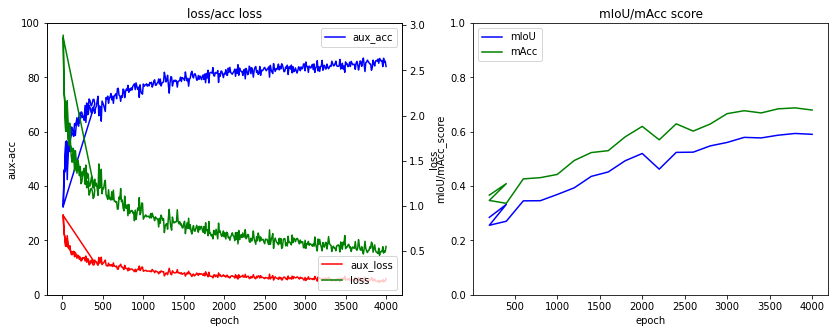

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = ax1.twinx()
line1, = ax2.plot(x_epoch_data,aux_loss,label='aux_loss',color='red') 
line2, = ax1.plot(x_epoch_data,aux_acc,label='aux_acc',color='blue')
line3, = ax2.plot(x_epoch_data,loss,label='loss',color='green')
ax1.set_title("loss/acc loss")
ax1.set_xlabel('epoch')
ax1.set_ylabel('aux-acc')
ax2.set_ylabel('loss')
ax1.set_ylim(0, 100)
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

ax3 = fig.add_subplot(1, 2, 2)
line1, = ax3.plot(x_epoch_data_2,mIou,label='mIoU',color='blue')
line2, = ax3.plot(x_epoch_data_2,mAcc,label='mAcc',color='green') 
ax3.set_title("mIoU/mAcc score")
ax3.set_xlabel('epoch')
ax3.set_ylabel('mIoU/mAcc_score')
ax3.set_ylim(0, 1)
ax3.legend(loc='upper left')

plt.show()


In [11]:
cfg_file = cfg.pretty_text
cfg_path = './work_dirs/tutorial_pspnet_r50A/cfg.py'

with open(cfg_path, mode='w') as f:
    f.write(cfg_file)

In [13]:
#mmsegmentationの実行のロード（GPUあり）
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot

config_file = cfg_path #configファイルのパス
checkpoint_file = 'work_dirs/tutorial_pspnet_r50A/latest.pth' #学習済みの最終モデル

model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: work_dirs/tutorial_pspnet_r50A/latest.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

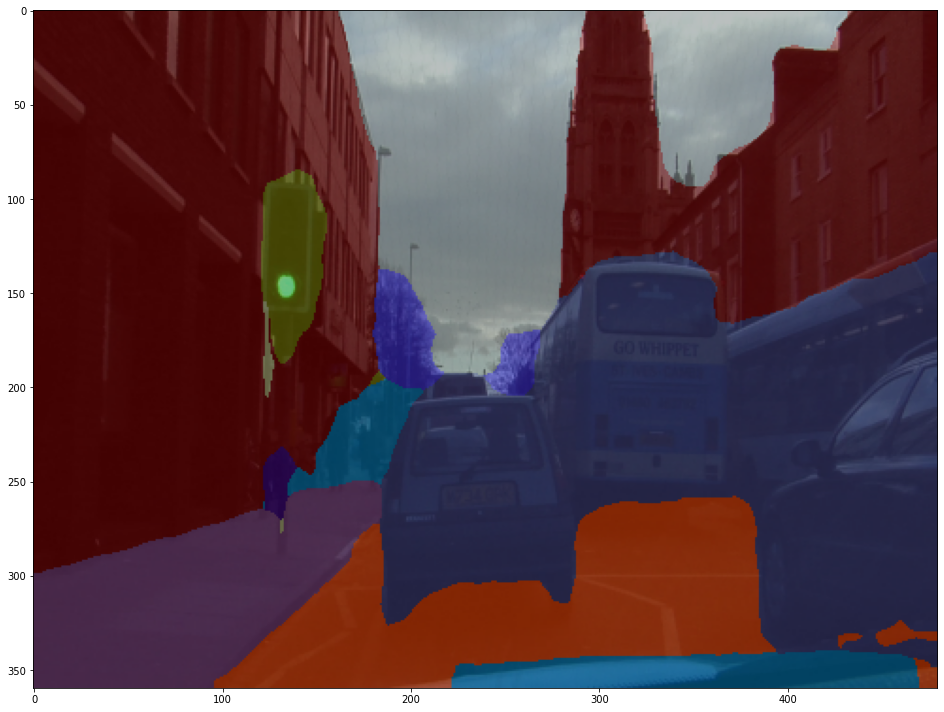

In [14]:
img = mmcv.imread('/content/data/CamVid/train/0001TP_006690.png')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)